In [1]:
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings                        # To ignore any warnings warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv") 
test=pd.read_csv("test.csv")

In [3]:
train_original=train.copy() 
test_original=test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.shape ,test.shape

((614, 13), (367, 12))

In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Hypothesis  

## Univariate analysis

In [8]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

i.e if we set all to 1 , we get a 68% accuracy all the time .

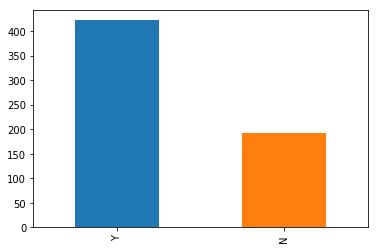

In [10]:
train['Loan_Status'].value_counts().plot.bar()

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)


### Independent Variable (Categorical)


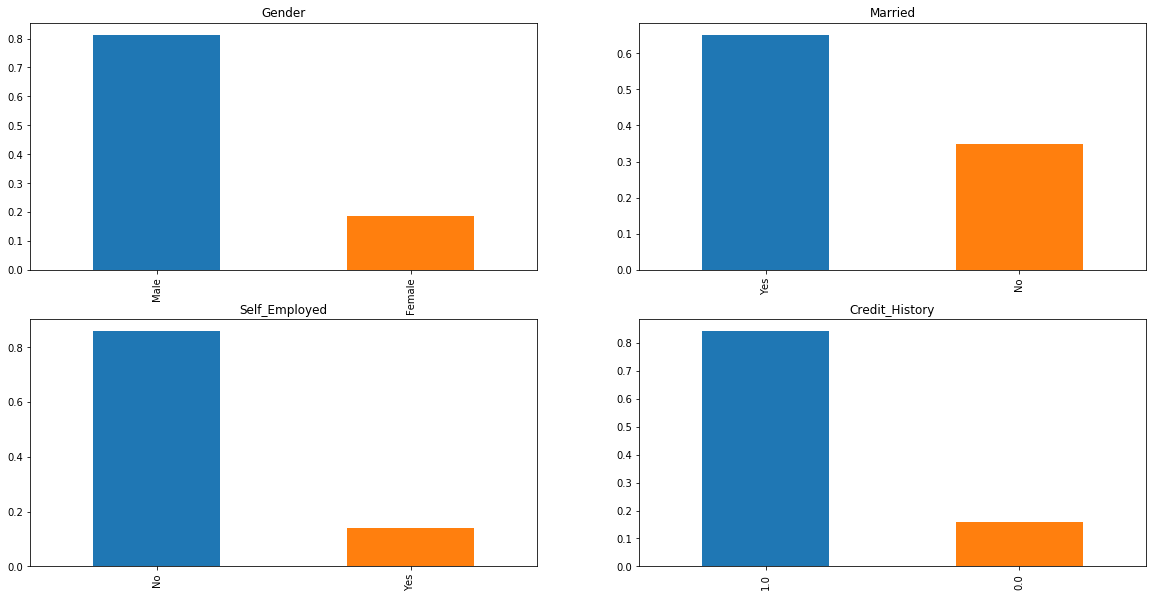

In [11]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

In [12]:
train['Gender'].value_counts(normalize=True)



Male      0.813644
Female    0.186356
Name: Gender, dtype: float64

In [13]:
train['Married'].value_counts(normalize=True)


Yes    0.651391
No     0.348609
Name: Married, dtype: float64

In [14]:
train['Self_Employed'].value_counts(normalize=True)


No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [15]:
train['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

It can be sen from plots and above:

81% applicants in the dataset are male.

Around 65% of the applicants in the dataset are married.

Around 14% applicants in the dataset are self employed.

Around 85% applicants have repaid their debts.


### Independent Variable (Ordinal)


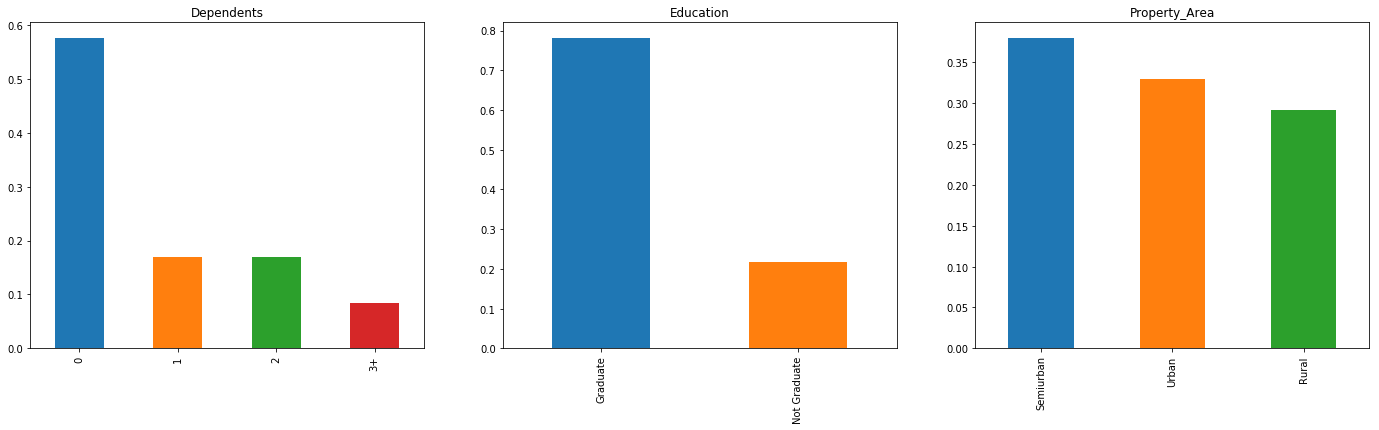

In [16]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [17]:
train['Dependents'].value_counts(normalize=True)


0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [18]:
train['Education'].value_counts(normalize=True)


Graduate        0.781759
Not Graduate    0.218241
Name: Education, dtype: float64

In [19]:
train['Property_Area'].value_counts(normalize=True) 


Semiurban    0.379479
Urban        0.328990
Rural        0.291531
Name: Property_Area, dtype: float64

we can infer from the above bar plots that :

Most of the applicants don’t have any dependents

Around 78% of the applicants are Graduate.

Most of the applicants are from Semiurban area and not huge diff between urban and semiurban.


### Independent Variable (Numerical)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


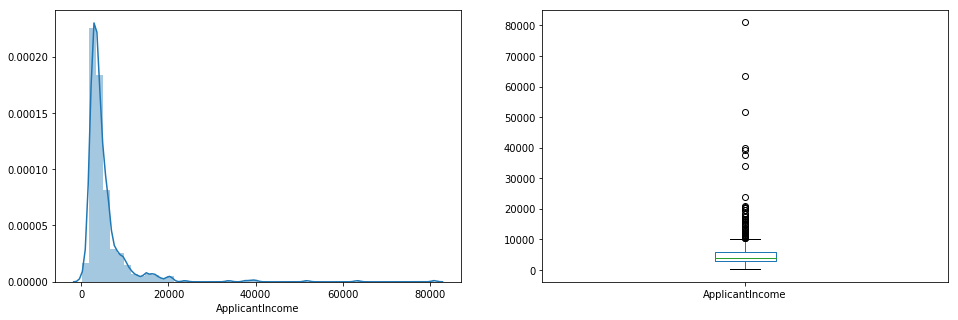

In [20]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

not normally distributed , can be made using log transformation.

lot of outliers , as income disparity is in society 


Text(0.5, 0.98, '')

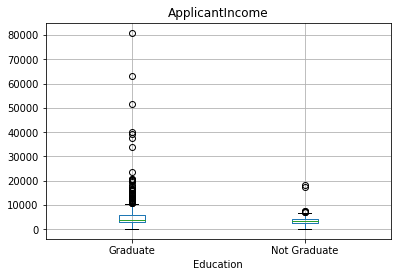

In [21]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")



higher no of graduates with higher income which appear to be outliers

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


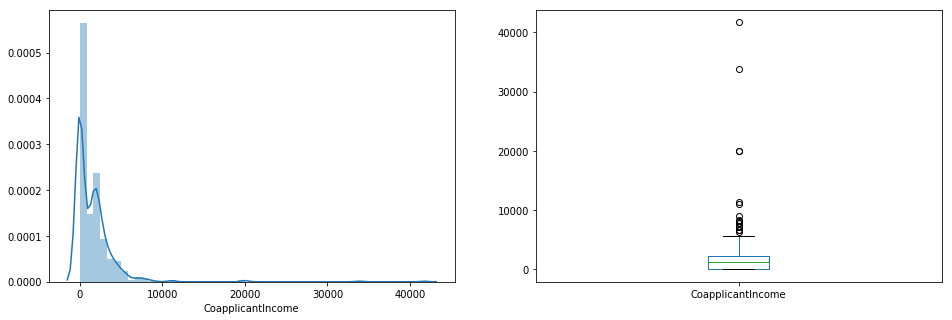

In [22]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

most coapplicant income within 10000

lot of outliers in the coapplicant income and not normally distributed as well

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


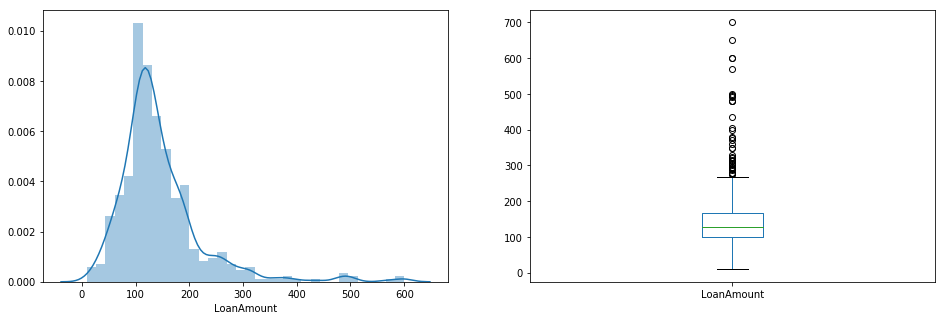

In [23]:
plt.figure(1) 
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']); 
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

lot of outliers and is fairly normally distributed

In [24]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## Bivariate analysis

### Categorical Independent Variable vs Target Variable

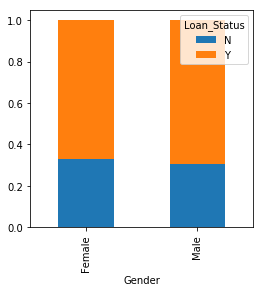

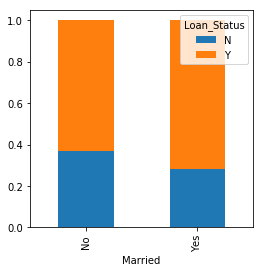

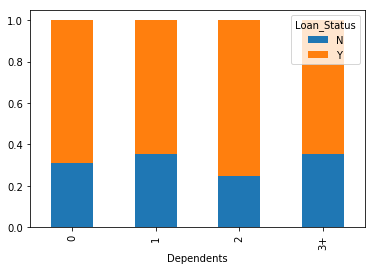

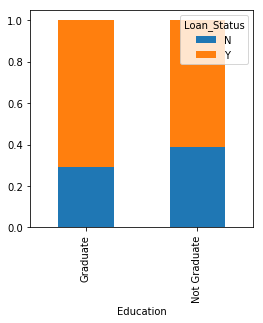

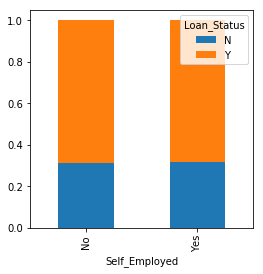

In [25]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status']) 
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


no much difference due to gender variable

more married people got loan

if dependents are 1 or 3+ then same proportion of getting loan

more graduates get loan

there is nothing significant we can infer from Self_Employed vs Loan_Status plot.


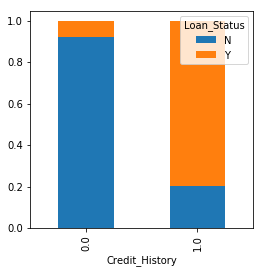

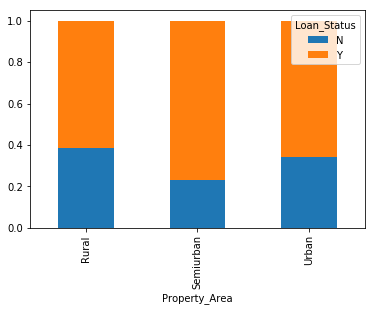

In [26]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()


 people with credit history as 1 are more likely to get their loans approved.

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

In [27]:
train['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

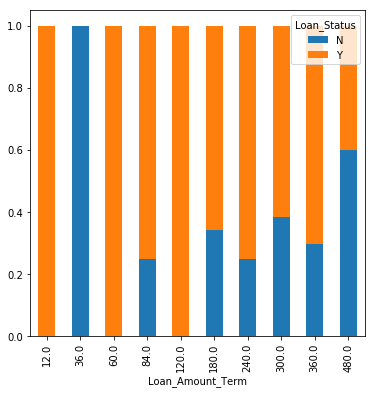

In [28]:
Loan_Amount_Term=pd.crosstab(train['Loan_Amount_Term'],train['Loan_Status'])
Loan_Amount_Term.div(Loan_Amount_Term.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,6)) 
plt.show() 

about 85% of loan amount term is 360 , and therefore we cant say about the relationship between loan amount term and loan status

### Numerical Independent Variable vs Target Variable

Text(0.5, 0.98, '')

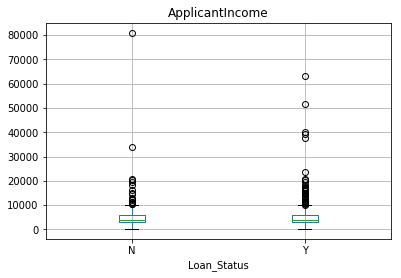

In [29]:
train.boxplot(column='ApplicantIncome', by = 'Loan_Status')
plt.suptitle("")


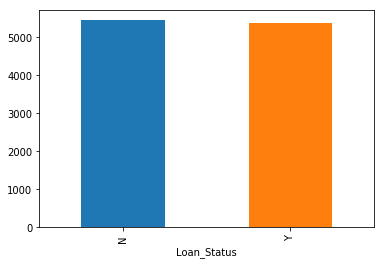

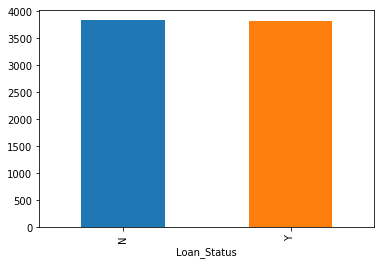

In [30]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()
train.groupby('Loan_Status')['ApplicantIncome'].median().plot.bar()
plt.show()

thero is not much difference due to an applicants income in loan status

Text(0.5, 0.98, '')

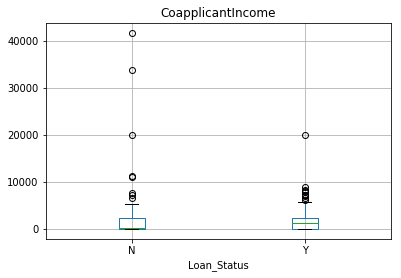

In [31]:
train.boxplot(column='CoapplicantIncome', by = 'Loan_Status')
plt.suptitle("")

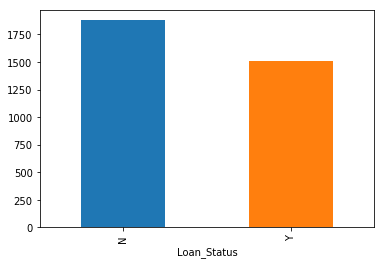

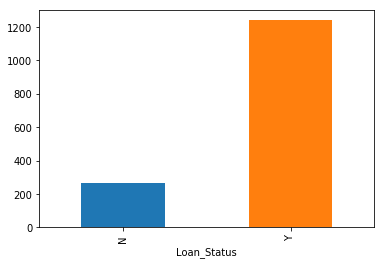

In [32]:
train.groupby('Loan_Status')['CoapplicantIncome'].mean().plot.bar()
plt.show()
train.groupby('Loan_Status')['CoapplicantIncome'].median().plot.bar()
plt.show()

shows the outlier trend in coapplicants income as median is close to zero since no coapplicant while mean is on higher side due to extensivly high income of few in loan not granted category . 

Text(0.5, 0.98, '')

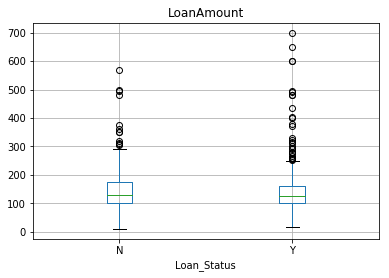

In [33]:
train.boxplot(column='LoanAmount', by = 'Loan_Status')
plt.suptitle("")

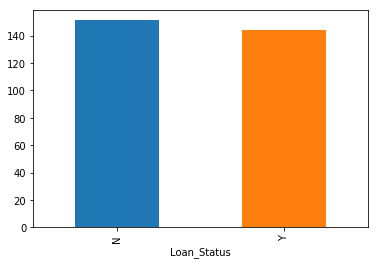

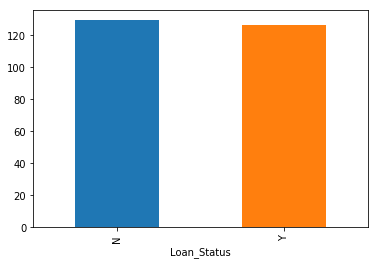

In [34]:
train.groupby('Loan_Status')['LoanAmount'].mean().plot.bar()
plt.show()
train.groupby('Loan_Status')['LoanAmount'].median().plot.bar()
plt.show()

not much can be said by the loan amount to infer about loan status.

In [35]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

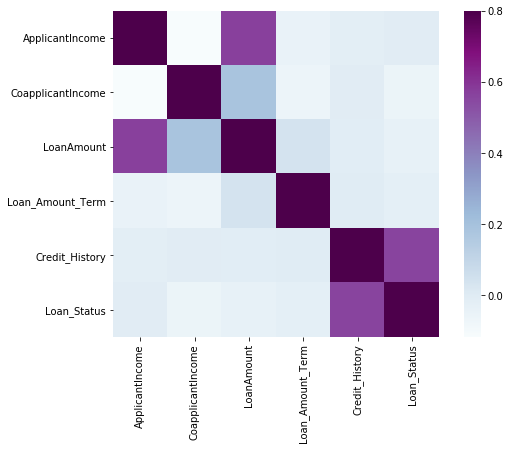

In [36]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Missing value imputation

In [37]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

method of imputation

For numerical variables: imputation using mean or median

For categorical variables: imputation using mode

In [38]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [39]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
#as 85% have loan amount term to be 360 

In [40]:
# as we saw that loan amount have outliers and meadian is not susceptible to outliers
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [41]:
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [42]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Model building

In [43]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [44]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

as model usually takes in numerical variables , we will convert categorical variables to numerical by using labelencoding or onehotencoding .

Using dummies in place of one hot encoding

In [45]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [106]:
test.shape , X.shape

((367, 21), (614, 20))

In [90]:
pd.DataFrame(X).to_csv('X.dummies.csv')

In [108]:
pd.DataFrame(test_original).to_csv('test_original.csv')

In [103]:
pd.DataFrame(test).to_csv('testdummies.csv')

In [46]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

### logistic regression 

In [48]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [49]:
model = LogisticRegression() 
model.fit(x_train, y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [50]:
pred_cv = model.predict(x_cv)

In [51]:
accuracy_score(y_cv,pred_cv)

0.7621621621621621

In [52]:
pred_test = model.predict(test)

In [53]:
submission=pd.read_csv("Sample_Submission.csv")

In [54]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

In [55]:
submission.shape

(367, 2)

In [56]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [57]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
scores=cross_val_score(estimator=model,X=X,y=y,cv=5,n_jobs=-1)

In [60]:
print('CV accuracy score: %s' %scores)

CV accuracy score: [0.81451613 0.75806452 0.78688525 0.86065574 0.81967213]


In [61]:
print(np.mean(scores))

0.8079587519830778


In [62]:
model.fit(X,y)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
pred_test1 = model.predict(test)

In [64]:
submission2=pd.read_csv("Sample_Submission.csv")

In [65]:
submission2['Loan_Status']=pred_test1 
submission2['Loan_ID']=test_original['Loan_ID']

In [66]:
submission2['Loan_Status'].replace(0, 'N',inplace=True) 
submission2['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission2, columns=['Loan_ID','Loan_Status']).to_csv('logistic2.csv')

#### using gridsearch cv for best parameters

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.0001,0.001,0.01,0.1,1,10.0,100.0,1000.0]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [69]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(model, hyperparameters, cv=5, n_jobs=-1)

In [70]:
best_model = clf.fit(X, y)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Penalty: l1
Best C: 0.1


In [72]:
print(best_model.best_score_)

0.8110749185667753


In [73]:
#prediction using best estimators
model1=best_model.best_estimator_
model1.fit(X,y)
pred_test3 = model1.predict(test)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
submission3=pd.read_csv("Sample_Submission.csv")
submission3['Loan_Status']=pred_test3 
submission3['Loan_ID']=test_original['Loan_ID']
submission3['Loan_Status'].replace(0, 'N',inplace=True) 
submission3['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission3, columns=['Loan_ID','Loan_Status']).to_csv('logistic3GridSearch.csv')

### tree

In [75]:
from sklearn import tree

In [76]:
model_tree = tree.DecisionTreeClassifier(random_state=1) 

In [77]:
scores=cross_val_score(estimator=model_tree,X=X,y=y,cv=5,n_jobs=-1)
print('CV accuracy score: %s' %scores)
print(np.mean(scores))

CV accuracy score: [0.71774194 0.66129032 0.68852459 0.75409836 0.71311475]
0.7069539925965097


accuracy is far low from logistic 

### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier


In [85]:
forest= RandomForestClassifier()

In [86]:
scores=cross_val_score(estimator=forest,X=X,y=y,cv=5,n_jobs=-1)
print('CV accuracy score: %s' %scores)
print(np.mean(scores))

CV accuracy score: [0.77419355 0.75       0.73770492 0.7704918  0.72131148]
0.7507403490216816


lets use gridsearch cv for finding best hyperparameters

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,10 , num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

In [88]:
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               }

In [89]:
clf_forest = GridSearchCV(estimator = forest, param_grid = grid, 
                          cv = 5, n_jobs = -1)

In [91]:
best_forest=clf_forest.fit(X,y)

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [92]:
print(clf_forest.best_params_)

{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 100}


In [93]:
print(clf_forest.best_score_)

0.8094462540716613


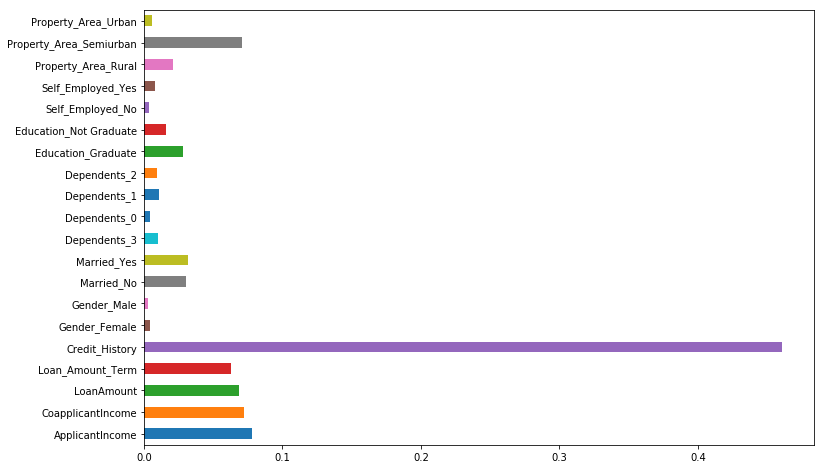

In [96]:
importances=pd.Series(modelF.feature_importances_, index=X.columns) 
importances.plot(kind='barh', figsize=(12,8))

In [95]:
#prediction using best estimators
modelF=best_forest.best_estimator_
modelF.fit(X,y)
pred_test4 = modelF.predict(test)

In [97]:
submission4=pd.read_csv("Sample_Submission.csv")
submission4['Loan_Status']=pred_test4 
submission4['Loan_ID']=test_original['Loan_ID']
submission4['Loan_Status'].replace(0, 'N',inplace=True) 
submission4['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission4, columns=['Loan_ID','Loan_Status']).to_csv('Forest.csv')

curious case

In [98]:
train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [99]:
pd.crosstab(train['Credit_History'],train['Loan_Status']) 

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,110,415


so if we just  use credit history then we are getting accuracy of 80.9 on train data

 so lets just use the credit history and apply on test data

In [100]:
test['Loan_status']=0
test.loc[(test['Credit_History'] == 1)  , 'Loan_status'] = 1

In [101]:
submission5=pd.read_csv("Sample_Submission.csv")
submission5['Loan_Status']=test['Loan_status'] 
submission5['Loan_ID']=test_original['Loan_ID']
submission5['Loan_Status'].replace(0, 'N',inplace=True) 
submission5['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission5, columns=['Loan_ID','Loan_Status']).to_csv('naive.csv')

this also gets us a accuracy of 77.8 on leader board , so no use of rest of the variables 

## new features and implementation of boosting algorithms in next notebook